In [ ]:
import glob
import pandas as pd
import h5py
import numpy as np
import os
import os
import sys
sys.path.append('/scratch_tmp/users/k21066795/BreastAgeNet')

import openslide
import h5py
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import pandas as pd
from torch.utils.data import DataLoader
from mpl_toolkits.axes_grid1 import ImageGrid


from utils_vis import *
from utils_model import *

In [2]:
# load BreastAgeNet
ckpt_name = "/scratch_tmp/users/k21066795/BreastAgeNet/data/epi0.9_UNI_250_MultiHeadAttention_bestModel.pt"
input_dim = get_input_dim(model_name = "UNI")
BreastAgeNet_model = BreastAgeNet(input_dim, attention="MultiHeadAttention", n_classes=3, n_heads=8, n_latent=512, attn_dropout=0.5, temperature=0.5, embed_attn=True)
BreastAgeNet_model.load_state_dict(torch.load(ckpt_name))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
BreastAgeNet_model = BreastAgeNet_model.to(device)

cuda


In [ ]:
## load reference
cluster_colors = {0: '#8da0cb', 1: '#66c2a5', 2: '#ffd92f', 3: '#b3b3b3'}
reference = pd.read_csv("/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/reference/FINAL_reference_BreastAgeNet_Cluster.csv")
kmeans_model = train_kmeans(reference, n_clusters=4)

In [16]:
wsi_id = "19001626_FPE_3"
WSI_df = run_BreastAgeNet_through_WSI(BreastAgeNet_model, wsi_id, folder=f"/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/WSIs_for_ST/TCs")
WSI_df = apply_kmeans(WSI_df, reference, kmeans_model)

/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/WSIs_for_ST/TCs/19001626_FPE_3/19001626_FPE_3_patch.csv
/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/WSIs_for_ST/TCs/19001626_FPE_3/19001626_FPE_3_bagFeature_UNI_augmentation.h5


100%|██████████| 4/4 [00:00<00:00,  4.87it/s]


Label Mapping: {0: 0, 2: 1, 1: 2, 3: 3}


In [22]:
WSI_df

,patch_id,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,...,embedding_508,embedding_509,embedding_510,embedding_511,attention_0,attention_1,attention_2,coord_X,coord_Y,Cluster
0,19001626_FPE_3_60_8_579,1.956601,0.000000,0.000000,0.092362,0.119025,1.184904,0.000000,0.484321,0.321706,...,0.320310,0.552853,0.829483,1.288638,-0.33630246,-1.0190725,-1.0358123,60.0,8.0,2
1,19001626_FPE_3_65_8_579,0.773079,0.000000,0.439167,0.332057,0.000000,0.589591,0.522158,0.109025,0.249035,...,0.349003,0.000000,0.132172,0.527581,-0.269858,-0.6488925,0.15100983,65.0,8.0,3
2,19001626_FPE_3_69_8_579,1.622290,0.000000,0.000000,0.003702,0.000000,0.509502,0.000000,0.062066,0.000000,...,0.531943,0.588965,0.186031,0.697927,-0.29546112,-0.6419294,0.8359697,69.0,8.0,3
3,19001626_FPE_3_72_8_579,1.861550,0.000000,0.000000,0.000000,1.984110,2.168810,1.168961,0.000000,0.000000,...,1.680446,0.000000,0.022340,1.913624,2.3872776,0.70901704,4.903264,72.0,8.0,0
4,19001626_FPE_3_73_8_579,1.409378,0.000000,0.000000,0.000000,1.390976,2.318581,0.269921,0.000000,0.000000,...,1.563128,0.000000,0.850378,2.532974,1.6136434,-0.5404211,2.7471156,73.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,19001626_FPE_3_200_157_579,0.763016,0.000000,0.000000,0.776595,0.911625,2.181620,0.321263,0.000000,0.000000,...,1.448170,0.000000,0.131868,2.403028,1.659363,0.25772876,1.7491287,200.0,157.0,1
959,19001626_FPE_3_201_157_579,1.799397,0.000000,0.102104,0.000000,1.542696,1.743852,0.289339,0.000000,0.000000,...,1.354312,0.000000,0.039832,2.173544,1.8061352,0.5815354,3.2907944,201.0,157.0,0
960,19001626_FPE_3_202_157_579,1.557429,0.000000,0.000000,0.605900,1.061547,1.987920,0.740980,0.218151,0.117126,...,1.449038,0.000000,0.000000,1.738521,0.7104432,-0.21643606,1.9675726,202.0,157.0,1
961,19001626_FPE_3_203_157_579,0.745056,0.397328,0.000000,0.127690,0.000000,1.183569,0.080478,1.114337,0.125934,...,0.355380,0.342407,0.932253,0.725614,-0.68980557,-0.37117136,1.2952533,203.0,157.0,3


/users/k21066795/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


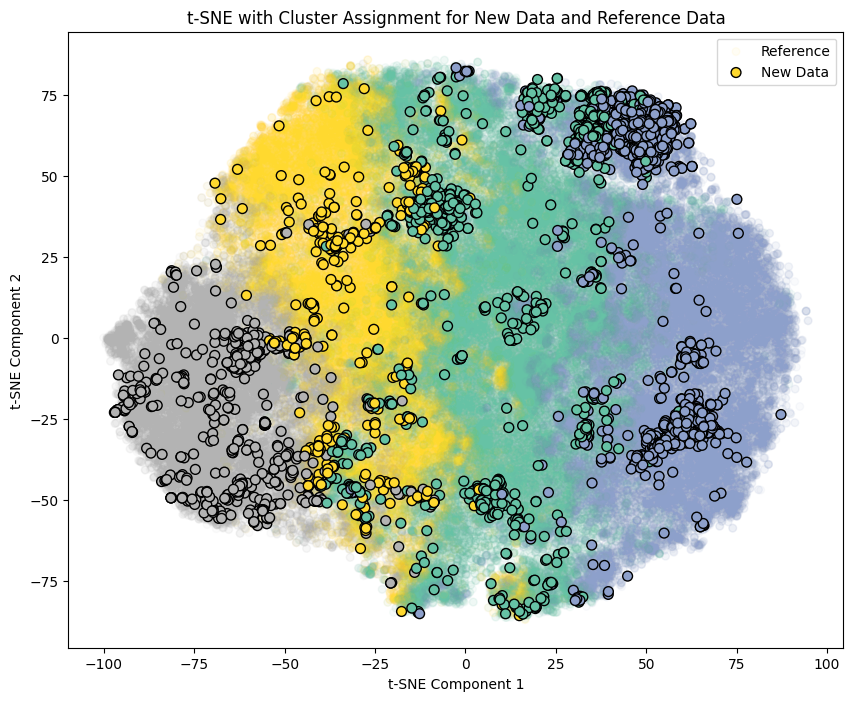

In [23]:
WSI_df, reference  = highlight_a_WSI_in_tsne(WSI_df, reference, cluster_colors, save_pt=None)

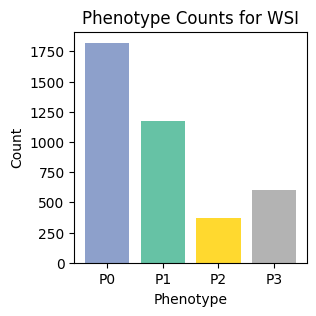

In [17]:
plot_cluster_proportion_for_a_WSI(WSI_df, save_pt=None)

/tmp/ipykernel_30185/4150980961.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  patch_size = int(np.unique(WSI_df["patch_size"]))


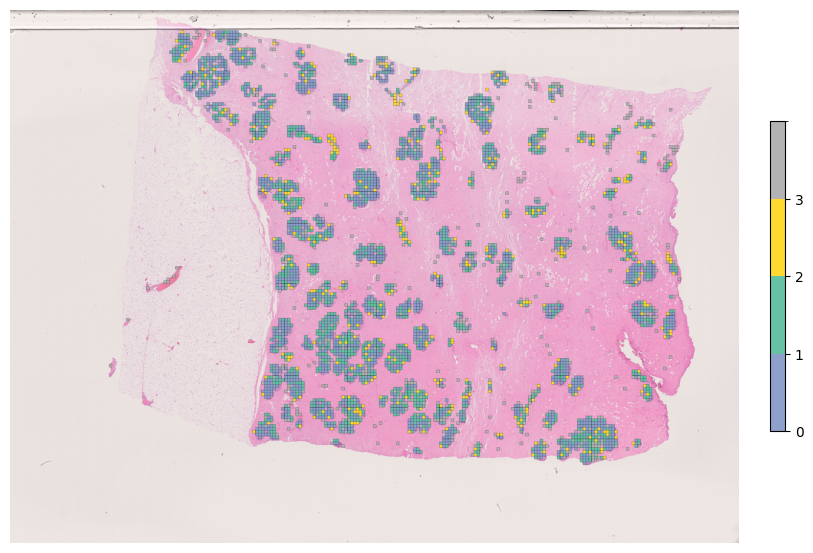

In [18]:
wsi_path = glob.glob(f"/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/WSIs/*/{wsi_id}*.*")[0]
new_df, wsi_img = draw_wsi_with_clusters(WSI_df, wsi_path, cluster_colors, level=5, save_pt=None)

In [19]:
clusters_json_for_a_WSI(new_df, wsi_id, cluster_colors, json_dir='/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/WSIs_for_ST/JSONs', require_bounds=False)

/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/WSIs_for_ST/JSONs/19001626_FPE_3_BreastAgeNet_clusters.json saved!
